# Описание проекта
Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. 

Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.


Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

# Шаг 1. Загрузите данные и подготовьте их к анализу
1.1. Положите данные о визитах, заказах и рекламных расходах в переменные;

1.2. Подготовьте данные. Убедитесь, что тип данных во всех колонках соответствует сохранённым в них значениям.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

# Предобработка visits

In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits.duplicated().sum()

0

In [7]:
# Меняем названия столбцов и приводит даты в порядок
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [8]:
#Изменим название колонок и приведём к нужному типу.
visits.columns = ['device', 'end_ts', 'source_id', 'start_ss', 'uid']

In [9]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ss'] = pd.to_datetime(visits['start_ss'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
visits['device'] = visits['device'].astype('category')

In [11]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ss     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


# Предобработка orders

In [13]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
orders.duplicated().sum()

0

In [16]:
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [17]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [18]:
orders = orders[['uid', 'revenue', 'purchase_ts']]

In [19]:
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid            50415 non-null uint64
revenue        50415 non-null float64
purchase_ts    50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


# Предобработка costs

In [21]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [23]:
costs.duplicated().sum()

0

In [24]:
costs = costs.rename(columns={"dt": "date"})

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
date         2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


# Вывод:
Серьезных проблем не было, привел названия столбцов в корректный формат, поменял тип данных в столбцах с датами, убрал пару лишних записей. Данные подготовлены для дальнейших манипуляций и обработки.

___

# Шаг 2. Рассчитайте метрики и постройте графики
Посчитайте метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.

После каждого пункта сформулируйте выводы.

__2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;__

In [26]:
visits.head()

,device,end_ts,source_id,start_ss,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [27]:
visits['day'] = visits['start_ss'].dt.date
visits['day_number'] = visits['start_ss'].dt.day
visits['month'] = visits['start_ss'].dt.month
visits['year'] = visits['start_ss'].dt.year
visits['week_number'] = visits['start_ss'].astype('datetime64[W]')
visits['day_of_week'] = visits['start_ss'].astype('datetime64[D]')
visits['month_name'] = visits['start_ss'].astype('datetime64[M]')

In [28]:
visits.head()

,device,end_ts,source_id,start_ss,uid,day,day_number,month,year,week_number,day_of_week,month_name
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,20,12,2017,2017-12-14,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,19,2,2018,2018-02-15,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,1,7,2017,2017-06-29,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,2018-05-17,2018-05-20,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,27,12,2017,2017-12-21,2017-12-27,2017-12-01


In [29]:
DAU_mean = int(visits.groupby('day_of_week').agg({'uid': 'nunique'}).mean())
print("Ежедневная аудитория DAU", DAU_mean, 'человек')

Ежедневная аудитория DAU 907 человек


In [30]:
WAU_mean = int(visits.groupby('week_number').agg({'uid': 'nunique'}).mean())
print("Еженедельная аудитория WAU", WAU_mean, 'человек')

Еженедельная аудитория WAU 5724 человек


In [31]:
MAU_mean = int(visits.groupby('month_name').agg({'uid': 'nunique'}).mean())
print("Ежемесячная аудитория MAU", MAU_mean, 'человек')

Ежемесячная аудитория MAU 23228 человек


In [32]:
#Так же посчитаем среднее количество посещений
print("sticky factor = ", round(DAU_mean/WAU_mean, 2))

sticky factor =  0.16


In [33]:
#Построим графики метрик
DAU = visits.groupby('day').agg({'uid': 'nunique'})
WAU = visits.groupby('week_number').agg({'uid': 'nunique'})
MAU = visits.groupby('month').agg({'uid': 'nunique'})

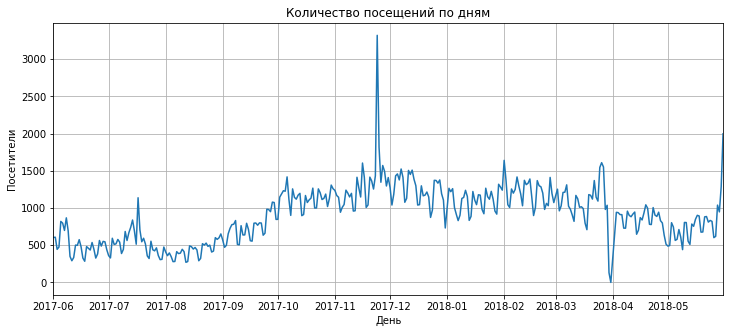

In [34]:
DAU.plot(grid=True, figsize=(12, 5), legend=None)
plt.xlabel("День")
plt.ylabel("Посетители")
plt.title("Количество посещений по дням")
plt.show()

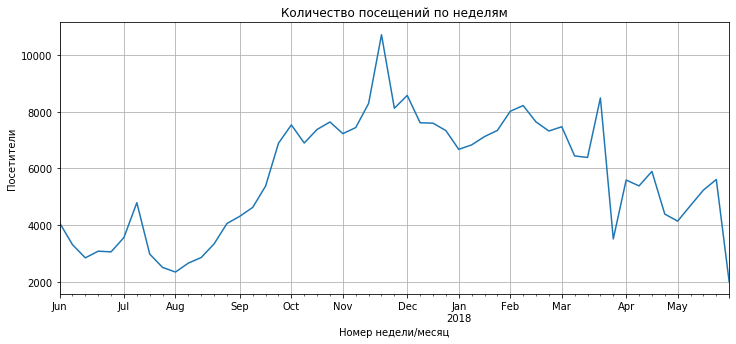

In [35]:
WAU.plot(grid=True, figsize=(12, 5), legend=None)
plt.xlabel("Номер недели/месяц")
plt.ylabel("Посетители")
plt.title("Количество посещений по неделям")
plt.show()

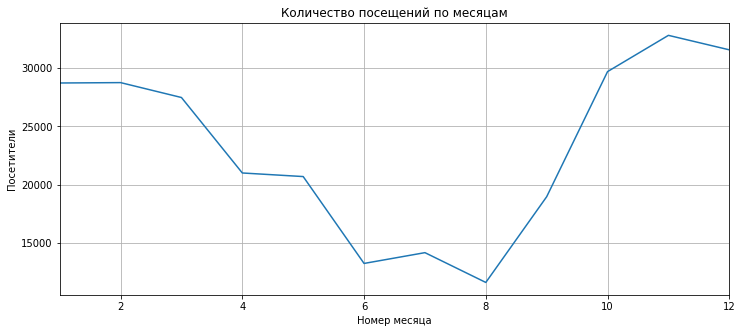

In [36]:
MAU.plot(grid=True, figsize=(12, 5), legend=None)
plt.xlabel("Номер месяца")
plt.ylabel("Посетители")
plt.title("Количество посещений по месяцам")
plt.show()

__Вывод:__

Итого "липкий фактор" является практически среднестатическим - 16%. 
- Ежедневная аудитория - 907 человек
- Еженедельная аудитория - 5724 человек
- Ежемесячная аудитория - 23228 человек.

____

__2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени__

In [37]:
sessions_by_day = visits.groupby(['day']).agg({'uid':['count']}).mean()
print('Среднее количество сессий в день', int(sessions_by_day))

Среднее количество сессий в день 987


In [38]:
session_per_user = sessions_by_day / DAU_mean
session_per_user

uid  count   1.09
dtype: float64

____

__2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно__

In [39]:
visits['session_duration_minutes'] = (visits['end_ts'] - visits['start_ss']).dt.total_seconds() / 60

In [40]:
#Очень странно, что получаются отрицательные сессии. Удалим их.
visits['session_duration_minutes'].describe()

count   359,400.00
mean         10.72
std          16.62
min         -46.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_duration_minutes, dtype: float64

In [41]:
visits = visits.query('session_duration_minutes >= 0')

In [42]:
visits['session_duration_minutes'].describe()

count   359,398.00
mean         10.72
std          16.62
min           0.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_duration_minutes, dtype: float64

In [43]:
#Тут лучше всего будет взять моду для того, чтобы узнать каким будет подавляющее большинство
visits['session_duration_minutes'].mode()

0   1.00
dtype: float64

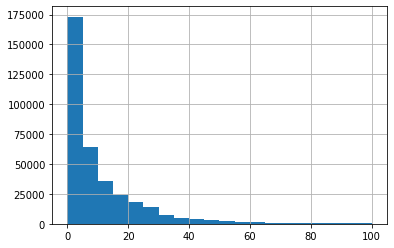

In [44]:
visits['session_duration_minutes'].hist(bins=20, range=(0,100))

In [45]:
print('Самая часто встречающаяся продолжительность сессии :',visits['session_duration_minutes'].mode()[0])

Самая часто встречающаяся продолжительность сессии : 1.0000000000000002


__Вывод:__
Самая часто встречающаяся продолжительность сессии - 1 минута. Тут либо клиенты уже нзаходят и уже знают, что конкретно будут покупать. Либо есть какой-то нерабочий функционал, который может отталкивать потребителя.

___

__2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.__

In [46]:
first_visits = visits.groupby('uid')['start_ss'].min()
first_visits.name='first_visit'
visits = visits.join(first_visits, on='uid')
visits['first_visit'] = visits['first_visit'].astype('datetime64[M]')

visits.head()

,device,end_ts,source_id,start_ss,uid,day,day_number,month,year,week_number,day_of_week,month_name,session_duration_minutes,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,20,12,2017,2017-12-14,2017-12-20,2017-12-01,18.00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,19,2,2018,2018-02-15,2018-02-19,2018-02-01,28.00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,1,7,2017,2017-06-29,2017-07-01,2017-07-01,0.00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,2018-05-17,2018-05-20,2018-05-01,24.00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,27,12,2017,2017-12-21,2017-12-27,2017-12-01,0.00,2017-12-01


In [47]:
# добавим год/месяц визита
visits['visit_month'] =  visits['start_ss'].astype('datetime64[M]')
visits['lifetime'] = ((visits['visit_month'] - visits['first_visit']) / np.timedelta64(1,'M')).round().astype('int')

In [48]:
# посчитаем сколько пользвателей было в каждой когорте в определенный lifetime
visit_cohorts = visits.groupby(['first_visit','lifetime'])['uid'].nunique().reset_index()
visit_cohorts.head()

,first_visit,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [49]:
# сохраним сколько пользователей было в 0ой lifetime в каждой когорте
initial_cohorts_users = visit_cohorts[visit_cohorts['lifetime'] == 0][['first_visit','uid']]
initial_cohorts_users.rename(columns={'uid':'initial_users'}, inplace=True)
initial_cohorts_users.head()

,first_visit,initial_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [50]:
visit_cohorts = visit_cohorts.merge(initial_cohorts_users, on='first_visit')

In [51]:
visit_cohorts

,first_visit,lifetime,uid,initial_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [52]:
visit_cohorts['retention'] = (visit_cohorts['uid']/visit_cohorts['initial_users'])*100
visit_cohorts['first_visit'] = visit_cohorts['first_visit'].dt.strftime('%Y-%m')
visit_groupby_cohorts = visit_cohorts.pivot_table(index='first_visit', columns='lifetime', 
                          values='retention', aggfunc='mean')
visit_groupby_cohorts.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit,,,,,,,,,,,,
2017-06,100.00,7.87,5.38,6.14,6.86,7.14,6.10,5.78,5.23,5.08,4.07,4.50
2017-07,100.00,5.61,5.13,5.62,5.82,4.82,4.54,4.57,3.88,2.86,2.75,
2017-08,100.00,7.69,6.29,6.28,5.01,4.40,3.63,3.95,2.79,2.60,,
2017-09,100.00,8.55,6.92,5.07,3.94,3.78,3.59,2.42,2.28,,,
2017-10,100.00,7.86,5.22,3.90,3.43,3.22,2.14,2.04,,,,
2017-11,100.00,7.83,4.41,3.87,3.37,2.34,2.18,,,,,
2017-12,100.00,5.58,3.80,3.11,2.03,1.90,,,,,,
2018-01,100.00,5.97,3.93,2.50,2.02,,,,,,,
2018-02,100.00,5.71,2.55,2.01,,,,,,,,


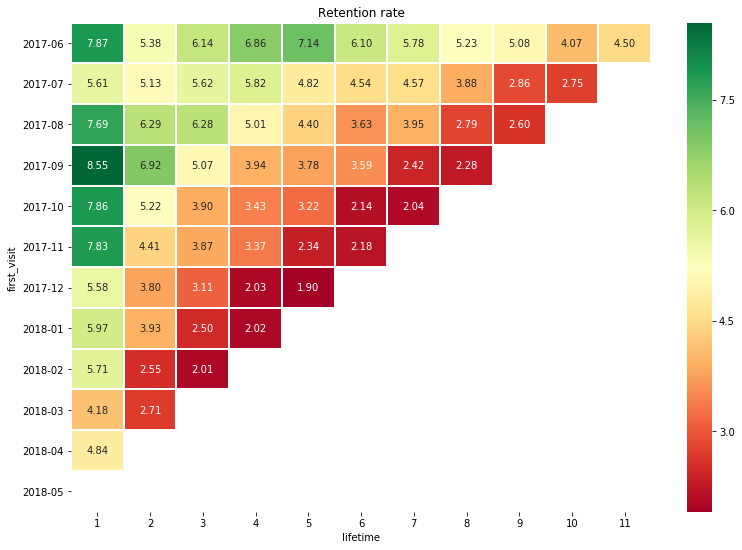

In [53]:
#Отбросим первый месяц жизни когорт
visit_groupby_cohorts.drop(0, axis=1, inplace=True)
visit_groupby_cohorts
plt.figure(figsize=(13, 9))
plt.title('Retention rate')
sns.heatmap(visit_groupby_cohorts,annot=True, fmt='.2f', linewidths=1, cmap="RdYlGn")

In [54]:
#Рассчитаем средний Retention Rate по второму месяцу.
print("Средний Retention Rate на 2-ой месяц:", visit_groupby_cohorts[1].mean().round(2))

Средний Retention Rate на 2-ой месяц: 6.52


__Вывод:__

Retention rate показывает, что на следующий месяц жизни мы теряем большую часть пользователей из когорты! Однако, в последующем отток становится уже не таким существенным, и с нами остается достаточно лояльная аудитория. По первой когорте в крайний год жизни видим даже увеличение retention. Как бы увеличить процент возврата...
Средний Retention Rate на 2-ой месяц равняется 6,52

Кроме того, каждый день сервисом пользуется в среднем 1к пользователей, в то время как среднее количество сессий тоже около 1к, то есть один пользователей, как правило незаходит за день дважды. Чаще всего пользователи проводят на сервисе минуту. Так же, судя по графику распределения, пользователям хватает около 5 минут нахождения в Я.Афише, нашлись даже такие, кто сидел на Афише почти сутки (возможно ошибка). 

___

__2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно.__

In [55]:
# найдем дату первой покупки и добавим в df с покупками
first_buy = orders.groupby('uid')['purchase_ts'].min()
first_buy.name = 'first_buy' 
orders = orders.join(first_buy, on='uid')
orders['first_buy_month'] = orders['first_buy'].astype('datetime64[M]')

In [56]:
# добавим в таблицу с визитами данные о первой покупке левым мерджем, так как не все посетители совершают покупки
visits = visits.merge(orders[['uid','first_buy_month']], on='uid', how='left')

In [57]:
# посчитаем сколько дней проходит между первой покупкой и первым визитом
visits['days_before_first_order'] = ((visits['first_buy_month'] - visits['first_visit'])/ np.timedelta64(1,'D')).astype('Int64')

In [58]:
visits['device'].unique()

[touch, desktop]
Categories (2, object): [touch, desktop]

In [59]:
visits[visits['device'] == 'touch']['days_before_first_order'].describe()

count   48,615.00
mean        53.95
std         78.49
min          0.00
25%          0.00
50%          0.00
75%         92.00
max        334.00
Name: days_before_first_order, dtype: float64

In [60]:
visits[visits['device'] == 'desktop']['days_before_first_order'].describe()

count   713,192.00
mean         13.70
std          37.81
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         334.00
Name: days_before_first_order, dtype: float64

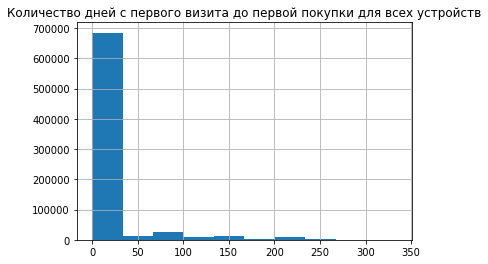

In [61]:
visits.loc[visits['days_before_first_order'].notna(),'days_before_first_order'].hist()
plt.title('Количество дней с первого визита до первой покупки для всех устройств');

__Вывод:__

Среднее время между первой покупкой и первым визитом для мобильных устрйоств - 53 дня, для декстопов 13. По всей видимости это значение слишком завышено, так как находятся посетители, которым требуется почти год на то чтобы решиться что-то купить.

Медиана же тут более показательна, она равна 0 у всех устройств, значит в большинстве случаев первая покупка приходится на первый визит. Чтобы наверняка, построим гистограмму.

____

__2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно__

In [62]:
# определим месяц покупки 
#purchases_grouped = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue' : 'count', 'uid' : 'nunique'})
#purchases_grouped

In [63]:
#purchases_grouped['purchases_per_user'] = purchases_grouped['revenue'] / purchases_grouped['uid']
#purchases_grouped = purchases_grouped.reset_index()
#purchases_grouped['lifetime'] = purchases_grouped['buy_month'] - purchases_grouped['first_buy_month']
#purchases_grouped['lifetime'] = ((purchases_grouped['lifetime'] / np.timedelta64(1, 'M'))).round().astype('int')
#purchases_per_user_cohorts = purchases_grouped.pivot_table(index = 'first_buy_month', 
#                                                           columns = 'lifetime',
#                                                           values = 'purchases_per_user', 
#                                                           aggfunc = 'mean'
#                                                           ).cumsum(axis = 1)
#purchases_per_user_cohorts

In [64]:
#purchases_per_user_cohorts[5].mean()

In [65]:
orders

,uid,revenue,purchase_ts,first_buy,first_buy_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:10:00,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:27:00,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:29:00,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-31 23:50:00,2018-05-01
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-31 23:50:00,2018-05-01
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-31 23:54:00,2018-05-01
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-31 23:56:00,2018-05-01


In [66]:
orders['buy_month'] = orders['purchase_ts'].astype('datetime64[M]')
orders_period = orders.rename(columns={'purchase_ts':'buy_date'})
orders_period = orders_period.rename(columns={'buy_ts':'first_buy'})

orders_period['first_buy'] = orders_period['first_buy'].astype('datetime64[M]')
orders_period['buy_date'] = orders_period['buy_date'].astype('datetime64[M]')

In [67]:
orders_period['cohort_lifetime'] = orders_period['buy_date'] - orders_period['first_buy']
orders_period['cohort_lifetime'] = orders_period['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_period['cohort_lifetime'] = orders_period['cohort_lifetime'].round().astype('int')

In [68]:
cohorts_avg_buys = orders_period.groupby(['first_buy', 'cohort_lifetime']).agg({'uid':'nunique', 
                                                                                'revenue':'count'}).reset_index() 
cohorts_avg_buys = cohorts_avg_buys.rename(columns={'revenue':'n_of_buys'})
cohorts_for_buyers = orders_period.groupby('first_buy').agg({'uid':'nunique'}).reset_index()
cohorts_for_buyers = cohorts_for_buyers.rename(columns={'uid':'initial_uid'})

cohorts_avg_buys = pd.merge(cohorts_avg_buys, cohorts_for_buyers, on='first_buy')
cohorts_avg_buys['buys_per_user'] = cohorts_avg_buys['n_of_buys']/cohorts_avg_buys['initial_uid']
avg_buys_pivot = cohorts_avg_buys.pivot_table(index='first_buy', columns='cohort_lifetime', 
                                              values='buys_per_user', aggfunc='mean').cumsum(axis=1)
avg_buys_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,nan
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,nan,nan
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,nan,nan,nan
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,nan,nan,nan,nan
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,nan,nan,nan,nan,nan
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,nan,nan,nan,nan,nan,nan
2018-01-01,1.12,1.19,1.24,1.25,1.28,nan,nan,nan,nan,nan,nan,nan
2018-02-01,1.12,1.18,1.21,1.22,nan,nan,nan,nan,nan,nan,nan,nan


In [69]:
print("На 6-ой месяц жизни когорты в среднем на пользователя приходится:",avg_buys_pivot[5].mean().round(2), "покупки")

На 6-ой месяц жизни когорты в среднем на пользователя приходится: 1.43 покупки


__2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени.__

In [70]:
# определим месяц покупки 
orders['year'] = orders['purchase_ts'].dt.year
orders['month'] = orders['purchase_ts'].dt.month
orders['week'] = orders['purchase_ts'].dt.week
orders['day'] = orders['purchase_ts'].dt.date

In [71]:
print('Количество заказов по годам')
display(orders.groupby('year')['revenue'].count())

Количество заказов по годам


year
2017    27467
2018    22948
Name: revenue, dtype: int64

In [72]:
# удалим единственный заказ в июне, так как он "заваливает" график
orders['purchase_ts'].max()
orders = orders.query('purchase_ts != "2018-06-01 00:02:00"')

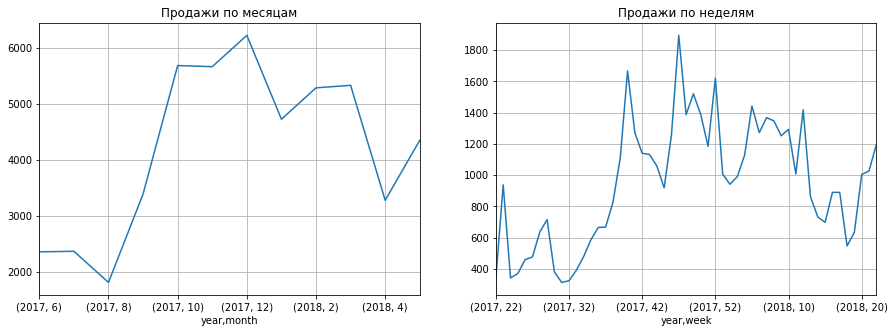

In [73]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
orders.groupby(['year','month'])['revenue'].count().plot(grid=True, ax=axs[0]).set_title('Продажи по месяцам')
orders.groupby(['year','week'])['revenue'].count().plot(grid=True, ax=axs[1]).set_title('Продажи по неделям');

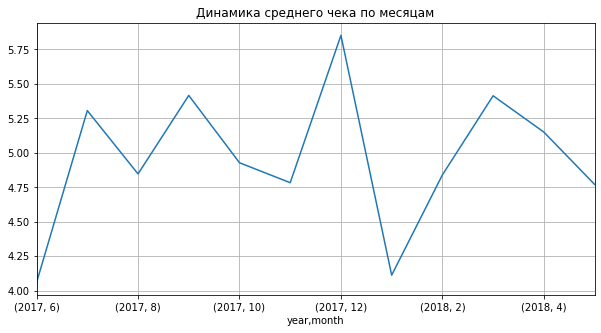

In [74]:
plt.figure(figsize=(10, 5))
orders.groupby(['year','month'])['revenue'].mean().plot(grid=True)
plt.title('Динамика среднего чека по месяцам');

__Вывод:__
Средний чек колеблится по стоимости от 4 - 5,75., пиковые значения были ближе под Новый Год (что не удивительно). И, вроде бы, после январского спада пошел подъем, но потом опять падение.

___

__2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике.__

In [75]:
# посчитаем количество пользователей каждой когорты 
orders_cohort_size = orders.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index()
orders_cohort_size.columns = ['first_buy_month', 'buyers']
orders_cohort_size

,first_buy_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [76]:
# рассчитаем выручку каждой когорты по месяцам и объединим таблицу с количеством пользователей и выручкой
orders_revenue = orders.groupby(['first_buy_month', 'buy_month'])['revenue'].sum().reset_index()
ltv_report = pd.merge(orders_cohort_size,orders_revenue, on='first_buy_month')

In [77]:
# выделим срок жизни когорт, посчитаем ltv и посмотрим на результат
ltv_report['lifetime'] = ((ltv_report['buy_month'] - ltv_report['first_buy_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_report['ltv'] = ltv_report['revenue']/ltv_report['buyers']
ltv = ltv_report.pivot_table(index='first_buy_month', values='ltv', columns='lifetime', 
                       aggfunc='sum', fill_value='', margins=True)
#ltv = ltv.cumsum(axis=1)
ltv

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,All
first_buy_month,,,,,,,,,,,,,
2017-06-01 00:00:00,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26,11.88
2017-07-01 00:00:00,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,,8.39
2017-08-01 00:00:00,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,,8.47
2017-09-01 00:00:00,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,,,,13.44
2017-10-01 00:00:00,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,,6.36
2017-11-01 00:00:00,5.15,0.40,0.20,0.32,0.15,0.05,0.11,,,,,,6.40
2017-12-01 00:00:00,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,,7.64
2018-01-01 00:00:00,4.14,0.29,0.30,0.14,0.06,,,,,,,,4.94
2018-02-01 00:00:00,4.16,0.28,0.08,0.07,,,,,,,,,4.59


__Вывод:__

В среднем пользователи начинают покупать на 13 (десктопы) и 53 (мобильные) день. Однако, чаще всего это происходит в день первого визита. Тем не менее, стоит задуматься, может на мобильных устрйоствах процесс покупки затруднен?

Пик покупок пришелся на первое полугодие и это связано с активностью на НГ, там было зафиксировано большее всего покупок. В свою очередь, месячный средний чек находится в районе +-5 у.е. с пиковым значением на НГ и падением в январе.

Самой прибыльной когортой оказалась 2017-09-01, и, естественно, самая первая, в силу того что она старше всех.

___

__2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.__

In [79]:
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [80]:
print('Всего потрачего на маркетинг -',costs['costs'].sum())

Всего потрачего на маркетинг - 329131.62


In [81]:
print('Выручка всего -',orders['revenue'].sum())

Выручка всего - 252053.77999999997


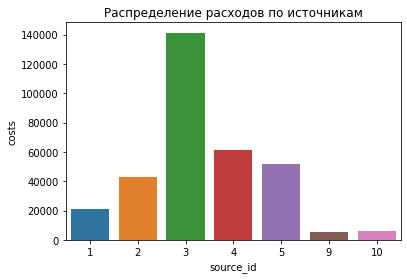

In [82]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
sns.barplot(x="source_id", y="costs", data=costs_by_source)
plt.title('Распределение расходов по источникам');

Итого на источник №3 было потрачено ДС больше всего.

In [83]:
costs['dt_month'] = costs['date'].astype('datetime64[M]')

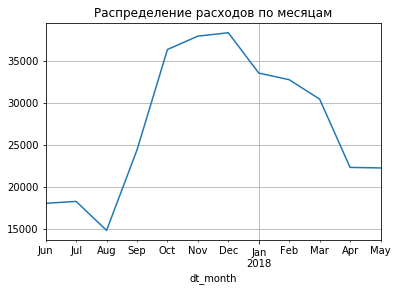

In [84]:
costs_by_months = costs.groupby(['dt_month'])['costs'].sum()
costs_by_months.plot(grid=True, title='Распределение расходов по месяцам');

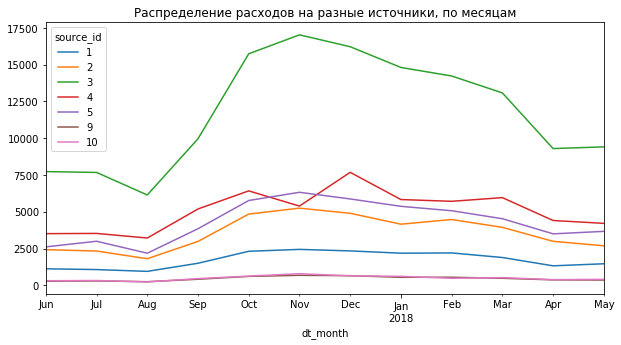

In [85]:
sources_costs_by_month = costs.pivot_table(index='dt_month', columns='source_id', values='costs', aggfunc='sum')
sources_costs_by_month.plot(figsize=(10, 5), title='Распределение расходов на разные источники, по месяцам');

__Вывод:__

Пик наших расходов (как и доходов) пришелся на осень/зиму 2017. Примечательно, хоть мы и тратитились в октябре/ноябре/декабре практически одинаково, действительно значимый результат был только в под новый год.

___

__2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках__

In [86]:
first_visit_full = visits.groupby(['uid'])['start_ss'].min().reset_index()
first_visit_full.columns = ['uid', 'first_visit_full']
visits = visits.merge(first_visit_full)

In [87]:
visits_by_source = visits.query('start_ss == first_visit_full')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'})
customers_by_source

,customers
source_id,
1,2899
2,3506
3,10473
4,10295
5,6931
7,1
9,1088
10,1329


In [88]:
cac = customers_by_source.merge(costs_by_source, on = 'source_id').reset_index()
cac = cac.fillna(0)
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,index,source_id,customers,costs,cac
2,2,3,10473,"141,321.63",13.49
1,1,2,3506,"42,806.04",12.21
4,4,5,6931,"51,757.10",7.47
0,0,1,2899,"20,833.27",7.19
3,3,4,10295,"61,073.60",5.93
5,5,9,1088,"5,517.49",5.07
6,6,10,1329,"5,822.49",4.38


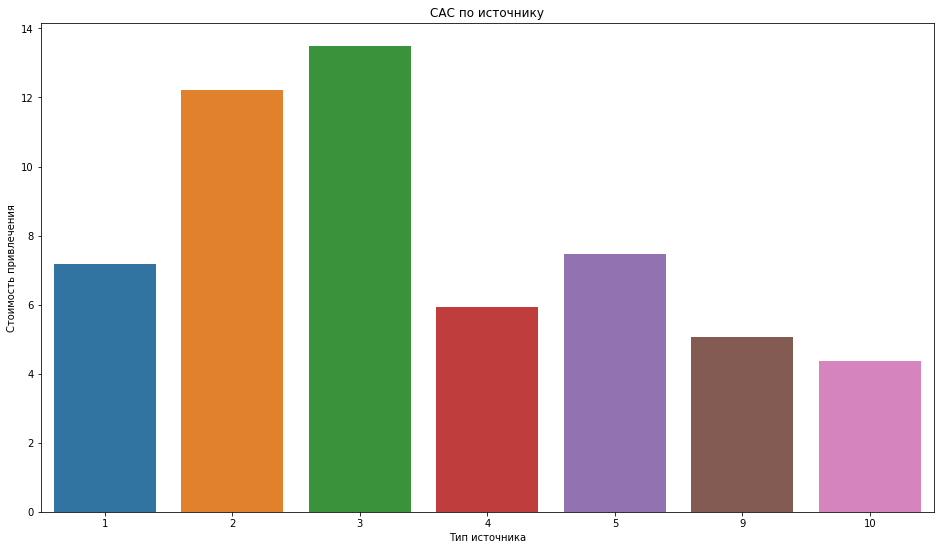

In [89]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

__Вывод:__

Дешевле всего обошлись посетители из 6 и 7 источника, там затраты приравниваются к нулю.

Топ-3 по самым низким затратам: 9, 10, 4

Видно, что самые дорогие пользователи из источника - 3 и 2. Может не стоит так много тратить на них, учитывая что из 4го (дешевого), к нам приходит на много больше пользователей чем с 3го. И второй тоже не выглядит сильно перспективным, в то время как с не дорого 5го мы получили больше клиентов.

__2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.__

In [90]:
romi_report = ltv_report.merge(costs_by_months, left_on='first_buy_month', right_on='dt_month')
romi_report['cac'] = romi_report['costs'] / romi_report['buyers']
romi_report['romi'] = (romi_report['ltv'] /  romi_report['cac']).round(2)

In [91]:
# приводим дату в более читабельный вид
romi_report['first_buy_month'] = romi_report['first_buy_month'].dt.strftime('%Y-%m')

In [92]:
romi = romi_report.pivot_table(index='first_buy_month', columns='lifetime', values='romi', aggfunc='mean').cumsum(axis=1)

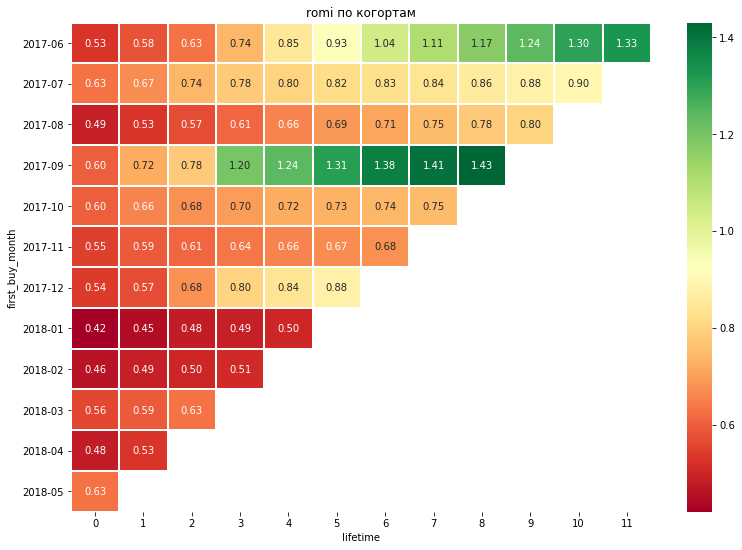

In [93]:
plt.figure(figsize=(13, 9))
plt.title('romi по когортам')
sns.heatmap(romi,annot=True, fmt='.2f', linewidths=1, cmap="RdYlGn");

In [94]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,"20,833.27"
1,2,"42,806.04"
2,3,"141,321.63"
3,4,"61,073.60"
4,5,"51,757.10"
5,9,"5,517.49"
6,10,"5,822.49"


In [95]:
visits_by_source

,device,end_ts,source_id,start_ss,uid,day,day_number,month,year,week_number,day_of_week,month_name,session_duration_minutes,first_visit,visit_month,lifetime,first_buy_month,days_before_first_order,first_visit_full
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,20,12,2017,2017-12-14,2017-12-20,2017-12-01,18.00,2017-12-01,2017-12-01,0,NaT,NaN,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,19,2,2018,2018-02-15,2018-02-19,2018-02-01,28.00,2018-02-01,2018-02-01,0,NaT,NaN,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,1,7,2017,2017-06-29,2017-07-01,2017-07-01,0.00,2017-07-01,2017-07-01,0,NaT,NaN,2017-07-01 01:54:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,9,3,2018,2018-03-08,2018-03-09,2018-03-01,28.00,2018-03-01,2018-03-01,0,2018-03-01,0,2018-03-09 20:05:00
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,27,12,2017,2017-12-21,2017-12-27,2017-12-01,0.00,2017-12-01,2017-12-01,0,NaT,NaN,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023806,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,23,4,2018,2018-04-19,2018-04-23,2018-04-01,8.00,2018-04-01,2018-04-01,0,2018-04-01,0,2018-04-23 21:11:00
1023807,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,8,11,2017,2017-11-02,2017-11-08,2017-11-01,0.00,2017-11-01,2017-11-01,0,NaT,NaN,2017-11-08 13:39:00
1023808,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,31,7,2017,2017-07-27,2017-07-31,2017-07-01,18.00,2017-07-01,2017-07-01,0,2017-07-01,0,2017-07-31 12:13:00
1023809,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,20,3,2018,2018-03-15,2018-03-20,2018-03-01,14.00,2018-03-01,2018-03-01,0,NaT,NaN,2018-03-20 15:11:00


In [96]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,"1,261,771.98"
1,2,"901,571.96"
2,3,"168,587.35"
3,4,"265,311.61"
4,5,"1,792,971.99"
5,7,1.22
6,9,"21,260.81"
7,10,"6,501.95"


In [97]:
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

In [98]:
roi.sort_values('roi', ascending = False)

,revenue,costs,roi
source_id,,,
1,"1,261,771.98","20,833.27",59.57
5,"1,792,971.99","51,757.10",33.64
2,"901,571.96","42,806.04",20.06
4,"265,311.61","61,073.60",3.34
9,"21,260.81","5,517.49",2.85
3,"168,587.35","141,321.63",0.19
10,"6,501.95","5,822.49",0.12
7,1.22,nan,nan


In [99]:
#Почему-то значительно начинает расходиться после слияния таблиц. Не понимаю в чём проблема :(
orders['revenue'].sum()

252053.77999999997

In [100]:
revenue_by_source['revenue'].sum()

4417978.869999332

In [101]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})

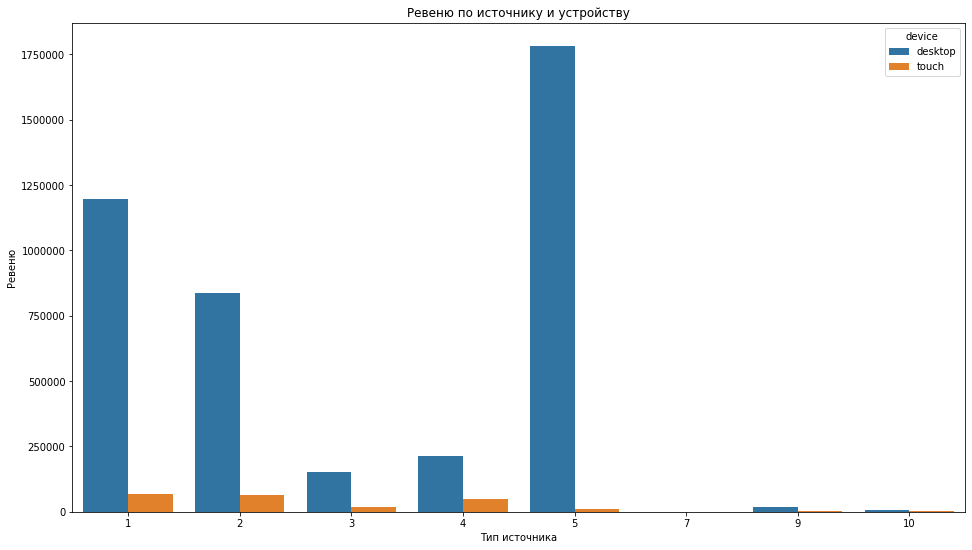

In [102]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device.reset_index())
plt.title('Ревеню по источнику и устройству')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Ревеню')
plt.show()

__Вывод:__

Как было отмечено ранее, когорта 2017-09 одна из лучших для бизнеса, вышла на окупаемость уже на 3 месяц. Кроме неё окупилась только самая первая когорта, на 6ой месяц жизни. И вторая когорта наиболее близка к тому, чтобы окупиться. Можно отметить, что почти каждая когорта в нулевой месяц жизни окупает свое привлечение +- на половину. Далее, из-за больших потерь пользователей для каждой когорты, окупаемость уже растет не так быстро.

___

# Общий вывод:
В работе были достаточно качественные датасеты, ошибок и проблем с ними было мало.

Что мы узнали о продукте и какие рекомендации можно дать. Как оказалось, retention Я.Афиши достаточно скромный (по крайней мере был), уже на первый месяц жизни к нам возвращается около 7% пользователей, и почти для каждой новой когорты этот показатель уменьшается. Что неминуемо сказывается на прибыли, окупились все 5 когорт, хотя по некоторым из них затраты на маркетинг достаточно высокие. Необходимо работать над удержанием пользователей, стимулировать их совершать больше покупок, устаривать акции и т.п.
Так же есть смысл пересмотреть вложения в источники под номером 3 и 10, т.к. доходы по сравнению с вложениями минимальны. 

Как показали графики выше, мы получаем больше всего пользователей из источника 4, в то время как тратим на привлечение не так много денег. Как минимум можно взять большу часть бюджета 2го источника и перенаправить на 4ый. Так как из второго мы получаем малый отклик. Аналогично нужно поступить с 5ым, его пользователи не дорогие, но оттуда мы имеем хороший поток посетителей, сопоставымий с 3им, который несмотря на свою дороговизну не оправдывает ожиданий.

Нелишним будет дополнительно изучить среднее время покупки на мобильных устройствах, почему-то оно значительно выше чем у десктопов. Наверняка есть вопросы при оплате, либо заказе..